# **TASK VL 1 - Data Scientist Salaries**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
from scipy import stats
import warnings
warnings.simplefilter("ignore")

## b) Daten einlesen und Überblick verschaffen (simple Metadaten)

* head() --> liefert Ansicht der ersten 5 Zeilen
* tail() --> liefert Ansicht der letzten 5 Zeilen
* info() --> liefert Informationen zu Spalten und Zeilen
* columns --> gibt Spaltennamen zurück
* shape --> liefert Dimensionen des Datensatzes
* dtypes --> zeigt Formate der Spaltenwerte an

In [2]:
from google.colab import drive
drive.mount('/content/drive')
pfad_zur_csv = '/content/drive/My Drive/py_data/'

Mounted at /content/drive


In [3]:
df = pd.read_csv(pfad_zur_csv+'data_science_salaries_2024.csv')
#df = pd.read_csv(pfad_zur_csv+'v2_DataScienceSalaries_aijobs.csv')
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## *Datensatz - Metadaten*
---------------------------------------------------

Der Datensatz enthält Informationen über Stellenbezeichnung, Beschäftigungsart, Erfahrungsstufe, Fachkenntnisstufe, Gehalt, Gehaltswährung, Unternehmensstandort, Gehalt in USD, Wohnort des Mitarbeiters, Unternehmensgröße und Jahr. Diese Informationen bieten einen umfassenden Überblick über berufsbezogene Details, Gehaltsniveaus, Unternehmensmerkmale und zeitliche Aspekte. Der Datensatz dient als Quelle für Personen, die eine Karriereberatung suchen, für Unternehmen, die ihre Vergütungsstrategien vergleichen möchten, und für Forscher, die die sich entwickelnde Dynamik des Arbeitsmarktes für Datenwissenschaftler untersuchen.

Datenquelle: https://ai-jobs.net/


**Attribute:**

* Job Title
* experience level
* employment_type
* work_models
* work_year
* employee_residence
* salary
* salary_currency
* salary_in_usd
* company_location
* company_cize

Details --> https://aijobs.net/salaries/download/

Terms of use --> https://aijobs.net/salaries/download/

In [4]:
df.shape

(6599, 11)

In [5]:
print(f"Der Datensatz enthält {df.shape[0]} Reihen und {df.shape[1]} Spalten.")

Der Datensatz enthält 6599 Reihen und 11 Spalten.


Datentypen:
Der Datensatz entält 5 Kategorien-Spalten und 3 numerische Spalten.

In [6]:
df.dtypes

,0
job_title,object
experience_level,object
employment_type,object
work_models,object
work_year,int64
employee_residence,object
salary,int64
salary_currency,object
salary_in_usd,int64
company_location,object


In [7]:
df["job_title"].unique()

array(['Data Engineer', 'Data Scientist', 'BI Developer',
       'Research Analyst', 'Business Intelligence Developer',
       'Data Analyst', 'Director of Data Science', 'MLOps Engineer',
       'Machine Learning Scientist', 'Machine Learning Engineer',
       'Data Science Manager', 'Applied Scientist',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Data Science',
       'Research Scientist', 'Research Engineer',
       'Managing Director Data Science', 'AI Engineer', 'Data Specialist',
       'Data Architect', 'Data Visualization Specialist', 'ETL Developer',
       'Data Science Practitioner', 'Computer Vision Engineer',
       'Data Lead', 'ML Engineer', 'Data Developer', 'Data Modeler',
       'Data Science Consultant', 'AI Architect',
       'Data Analytics Manager', 'Data Science Engineer',
       'Data Product Manager', 'Data Quality Analyst', 'Data Strategist',
       'Prompt Engineer', 'Data Science Lead',
       'Busi

In [8]:
df["employee_residence"].unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Uganda', 'Italy', 'Thailand',
       'Philippines', 'Tunisia', 'Belgium', 'Turkey', 'Nigeria',
       'Uzbekistan', 'Argentina', 'France', 'Kuwait', 'Ukraine',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Armenia', 'Russia', 'Georgia', 'Qatar', 'Peru', 'Poland',
       'New Zealand', 'Norway', 'Netherlands', 'Mexico', 'Latvia',
       'Pakistan', 'Lithuania', 'South Korea', 'Kenya', 'Moldova',
       'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece', 'Ghana',
       'Finland', 'Estonia', 'Cyprus', 'Ecuador', 'Austria', 'Colombia',
       'Switzerland', 'Central African Republic', 'Czech Republic',
       'Brazil', 'Bosnia and Herzegovina', 'Andorra', 'China',
       'Costa Rica', 'Chile', 'Bolivia', 'Malaysia',
       'United Arab Emirates', 'Puerto Rico', 'Japan', 'Iran',
 

In [9]:
a =df["employee_residence"].unique()
print(len(a))

87


In [11]:
deutschland_count = df[df['employee_residence'] == 'Germany'].shape[0]
print(f"Anzahl Data Scientists aus Deutschland: {deutschland_count}")

Anzahl Data Scientists aus Deutschland: 71


## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [12]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

job_title - 0
experience_level - 0
employment_type - 0
work_models - 0
work_year - 0
employee_residence - 0
salary - 0
salary_currency - 0
salary_in_usd - 0
company_location - 0
company_size - 0


## d) Duplikate

redundante Datenpunkte finden und entfernen

In [13]:
df.duplicated().sum()

0

# Explorative Analyse

**Weiter umschauen in den Daten** ---> Visualisierung - Wieviele Meldungen pro Herkunftsland?

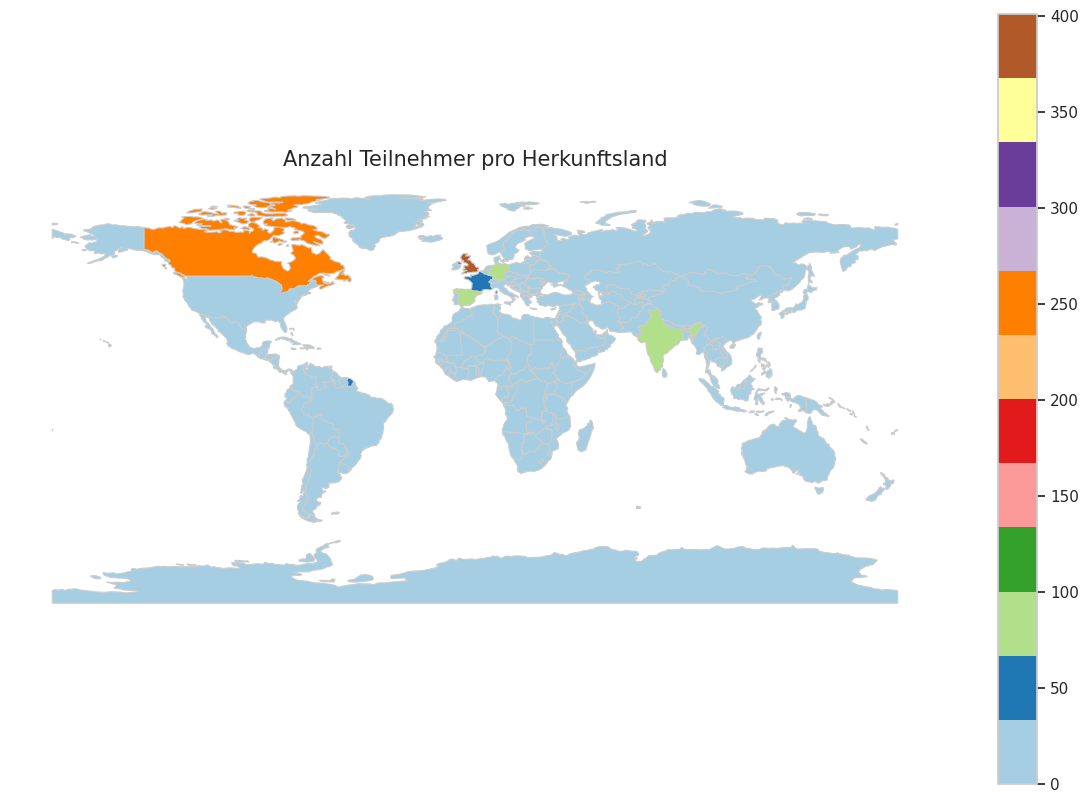

In [41]:
import geopandas as gpd

country_counts = df['employee_residence'].value_counts().reset_index()
country_counts.columns = ['employee_residence', 'count']

# Weltkarte laden
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Die Namen der Länder im DataFrame mit der Karte zusammenführen
world = world.merge(country_counts, how="left", left_on="NAME", right_on="employee_residence")

# Länder ohne Daten auf 0 setzen
world['count'] = world['count'].fillna(0)

# Karte plotten
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='count', cmap='Paired', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Achsen und Titel anpassen
ax.set_title('Anzahl Teilnehmer pro Herkunftsland', fontsize=15)
ax.set_axis_off()
plt.show()

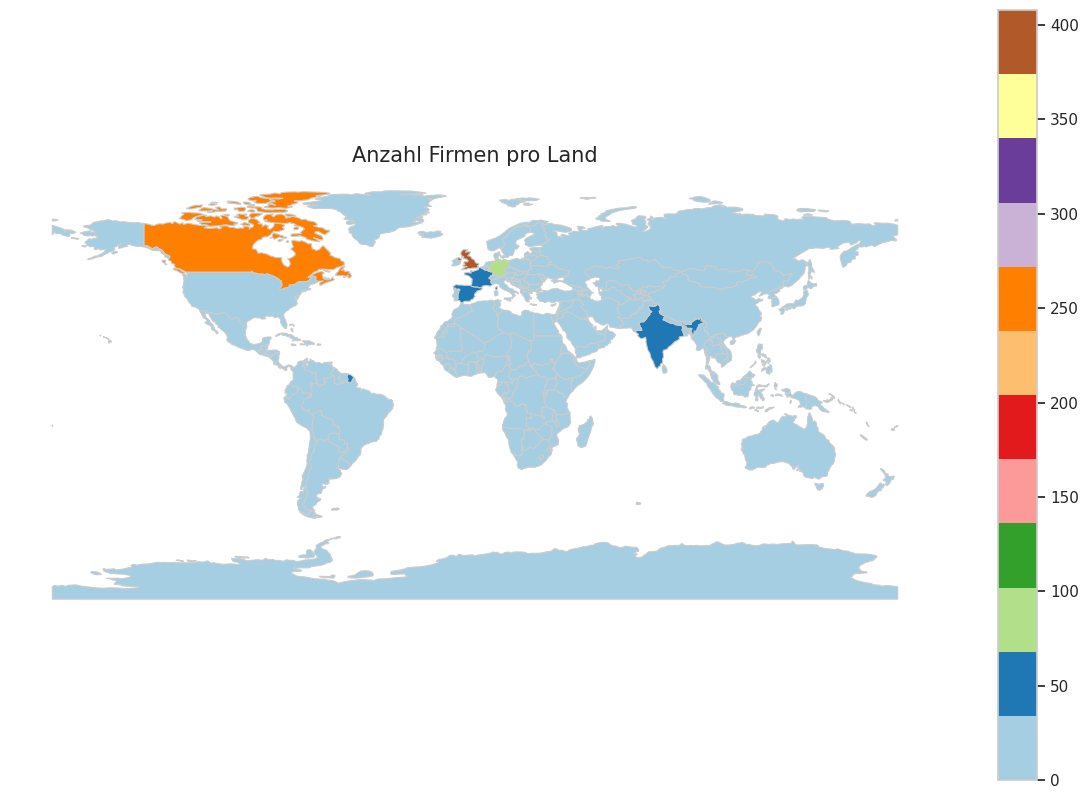

In [42]:
import geopandas as gpd

country_counts = df['company_location'].value_counts().reset_index()
country_counts.columns = ['company_location', 'count']

# Weltkarte laden
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Die Namen der Länder im DataFrame mit der Karte zusammenführen
world = world.merge(country_counts, how="left", left_on="NAME", right_on="company_location")

# Länder ohne Daten auf 0 setzen
world['count'] = world['count'].fillna(0)

# Karte plotten
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='count', cmap='Paired', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Achsen und Titel anpassen
ax.set_title('Anzahl Firmen pro Land', fontsize=15)
ax.set_axis_off()
plt.show()

**Übergang von Data Cleaning zu Inhalten** --> z.B. Wie ist die Datenverteilung über die verschiedenen Jahre?

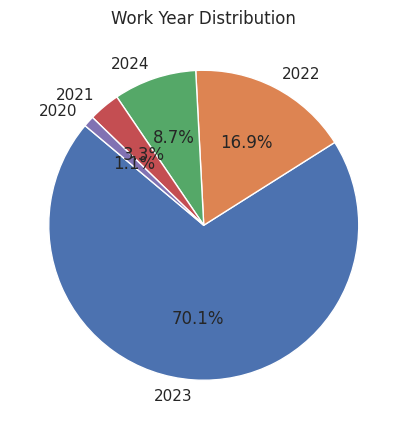

In [25]:
work_year_counts = df['work_year'].value_counts()
plt.figure(figsize=(5, 8))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Year Distribution')
plt.show()


## a) Erste Übersicht mit deskriptiver Statistik


In [14]:
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


##b) Visualisierung der Verteilungen - univariate Analyse

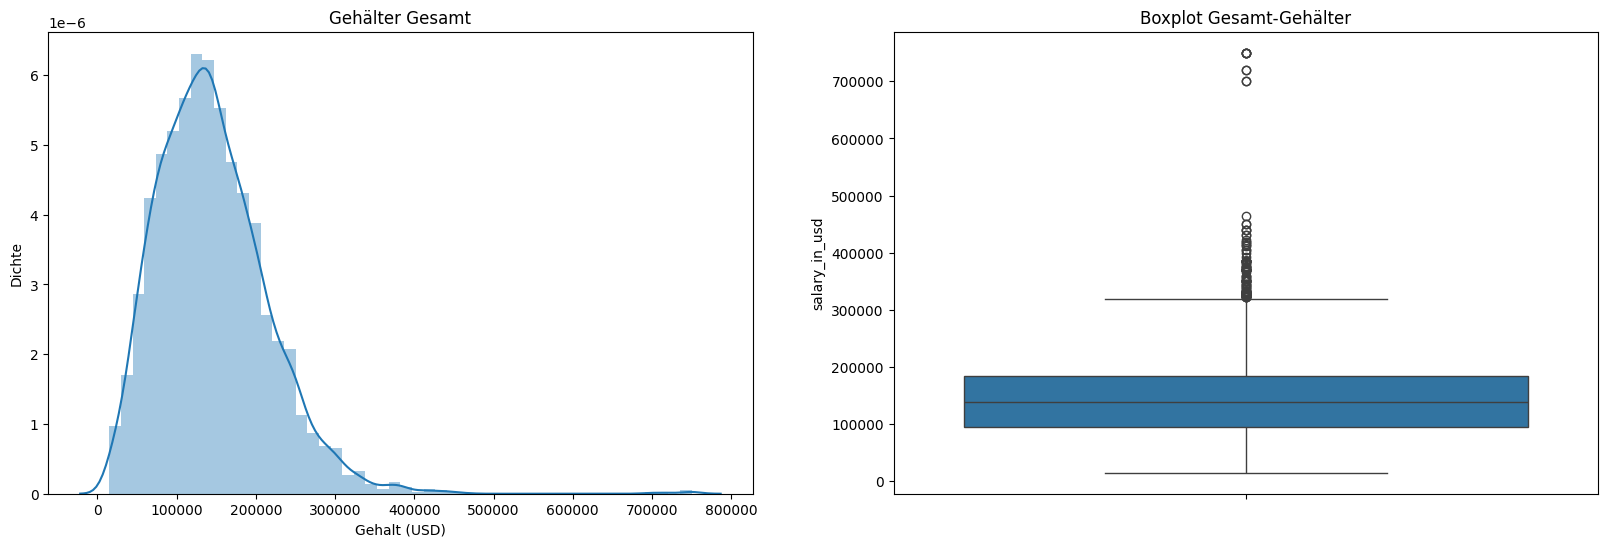

In [15]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Gehälter Gesamt')
sns.distplot(df['salary_in_usd'])
plt.xlabel('Gehalt (USD)')
plt.ylabel('Dichte')

plt.subplot(1,2,2)
plt.title('Boxplot Gesamt-Gehälter')
sns.boxplot(y=df['salary_in_usd'])

plt.show()

In [16]:
category = df['experience_level'].unique()
print("Kategorien in Experience Level: ", category)

Kategorien in Experience Level:  ['Mid-level' 'Senior-level' 'Entry-level' 'Executive-level']


## Multivariate Analyse - Vergleich der verschiedenen Entwicklungsstufen

**Wie ist die Datenverteilung in den einzelnen Gruppen - Grundlage jeder Statistik** --> wie belastbar / vergleichbar sind die Daten?

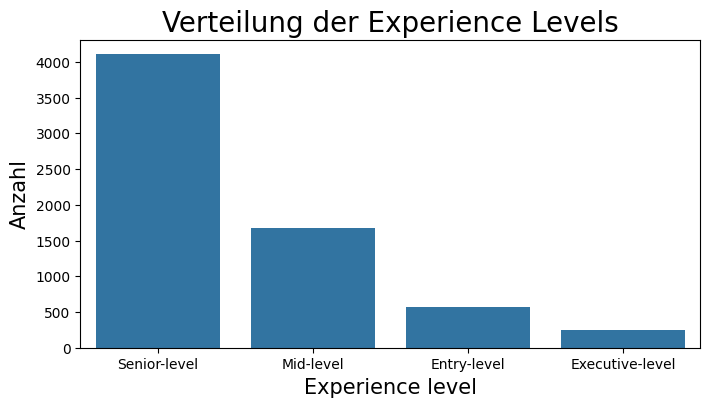

In [17]:
# Balkendiagramm mit seaborn countplot
plt.figure(figsize=(8,4))
sns.countplot(data = df, x = 'experience_level', order = df['experience_level'].value_counts().index)
plt.title("Verteilung der Experience Levels",fontsize=20)
plt.xlabel("Experience level",fontsize=15)
plt.ylabel("Anzahl",fontsize=15)
plt.show()

**Deutlich mehr Einträge von Senior-Level Data Scientists!!!**

In [18]:
df.groupby("experience_level").describe()

work_year                                                 \
                     count         mean       std     min     25%     50%   
experience_level                                                            
Entry-level          565.0  2022.633628  0.892404  2020.0  2022.0  2023.0   
Executive-level      254.0  2022.787402  0.690190  2020.0  2023.0  2023.0   
Mid-level           1675.0  2022.786269  0.779626  2020.0  2023.0  2023.0   
Senior-level        4105.0  2022.858952  0.581835  2020.0  2023.0  2023.0   

                                  salary                 ...            \
                     75%     max   count           mean  ...       75%   
experience_level                                         ...             
Entry-level       2023.0  2024.0   565.0  162796.054867  ...  119200.0   
Executive-level   2023.0  2024.0   254.0  215203.681102  ...  230000.0   
Mid-level         2023.0  2024.0  1675.0  191858.816716  ...  152487.5   
Senior-level      2023.0  2024.0  4105.0  174198.581973  ...  200000.0   

                             salary_in_usd                               \
                         max         count           mean           std   
experience_level                                                          
Entry-level        6600000.0         565.0   84448.916814  48758.315152   
Executive-level    6000000.0         254.0  189687.346457  71571.166828   
Mid-level         30400000.0        1675.0  119019.812537  71783.359309   
Senior-level       7500000.0        4105.0  162071.063581  64444.875091   

                                                                   
                      min       25%       50%       75%       max  
experience_level                                                   
Entry-level       15000.0   49646.0   75000.0  110000.0  350000.0  
Executive-level   15000.0  136000.0  184560.0  230000.0  465000.0  
Mid-level         15000.0   73523.0  106500.0  150000.0  750000.0  
Senior-level      15809.0  118000.0  153600.0  199200.0  750000.0  

[4 rows x 24 columns]

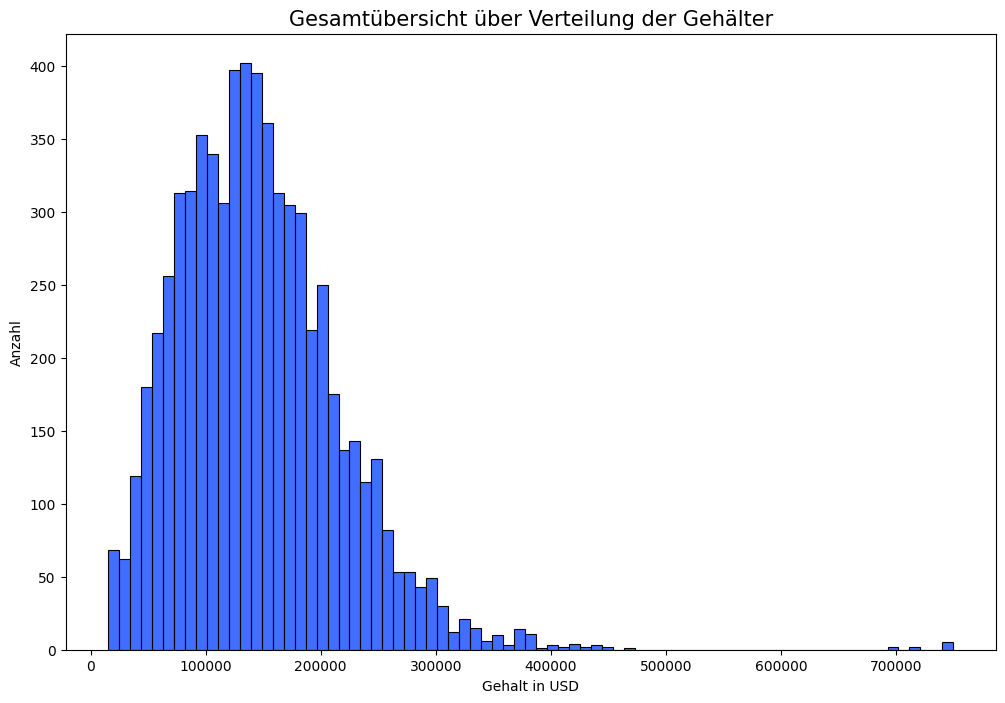

In [19]:
# Histogramm zur Verteilung der Gehälter
plt.figure(figsize=(12,8))
sns.set_palette("bright")
sns.histplot(data=df,x='salary_in_usd')
plt.title("Gesamtübersicht über Verteilung der Gehälter",fontsize=15)
plt.xlabel('Gehalt in USD')
plt.ylabel('Anzahl')
plt.show()

In [20]:
# damit im Boxplot darunter die Boxen sortiert nach den Mittelwerten erscheinen, muss eine neue Indizierung eingeführt werden!
mean_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
df['experience_level'] = pd.Categorical(df['experience_level'], categories=mean_salary.index, ordered=True)

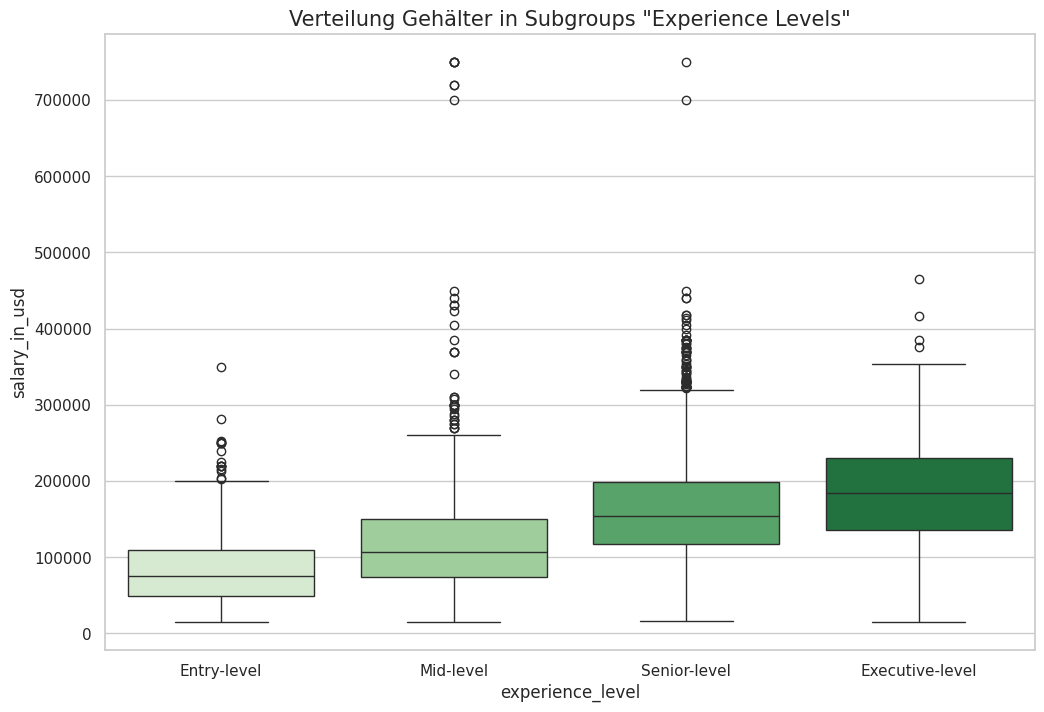

In [21]:
# Boxplots für die Gehälter aufgeschlüsselt für die Kategorien der Attribut-Gruppe "Experience Level"
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
plt.title('Verteilung Gehälter in Subgroups "Experience Levels"', fontsize = 15)
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette=("Greens"))
plt.show()

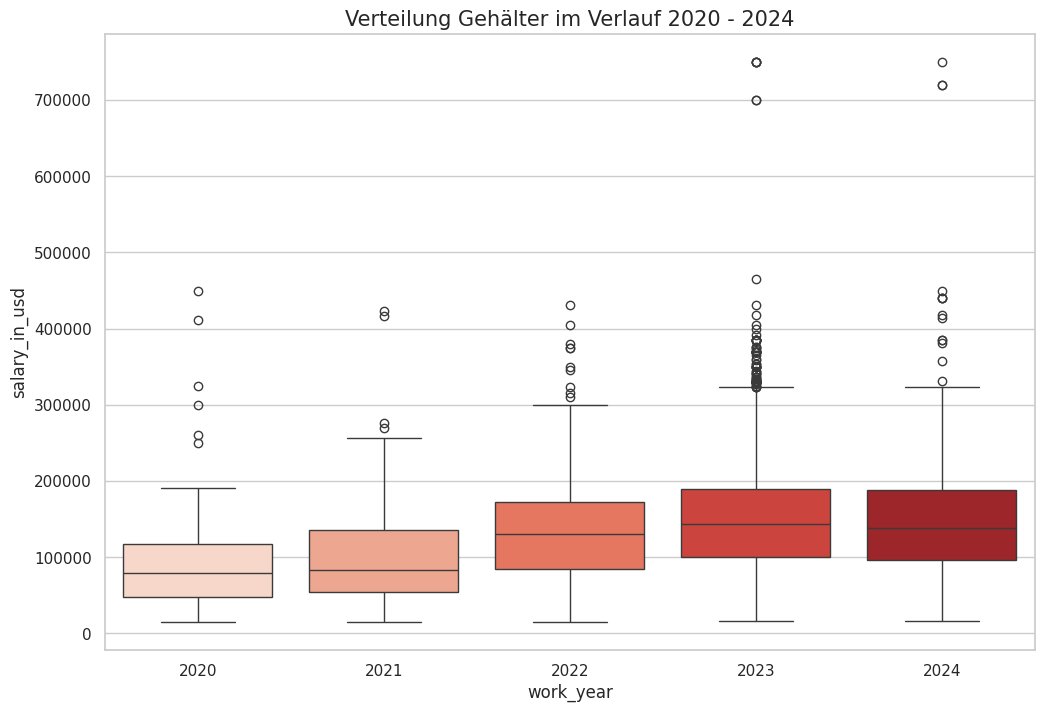

In [22]:
# Boxplots für die Gehälter aufgeschlüsselt für die verschiedenen Jahre
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
plt.title('Verteilung Gehälter im Verlauf 2020 - 2024', fontsize = 15)
sns.boxplot(data=df, x='work_year', y='salary_in_usd', palette=("Reds"))
plt.show()

Multivariate Analyse - Entwicklung der Gehälter über die Jahre in Abhängigkeit von der Firmengröße

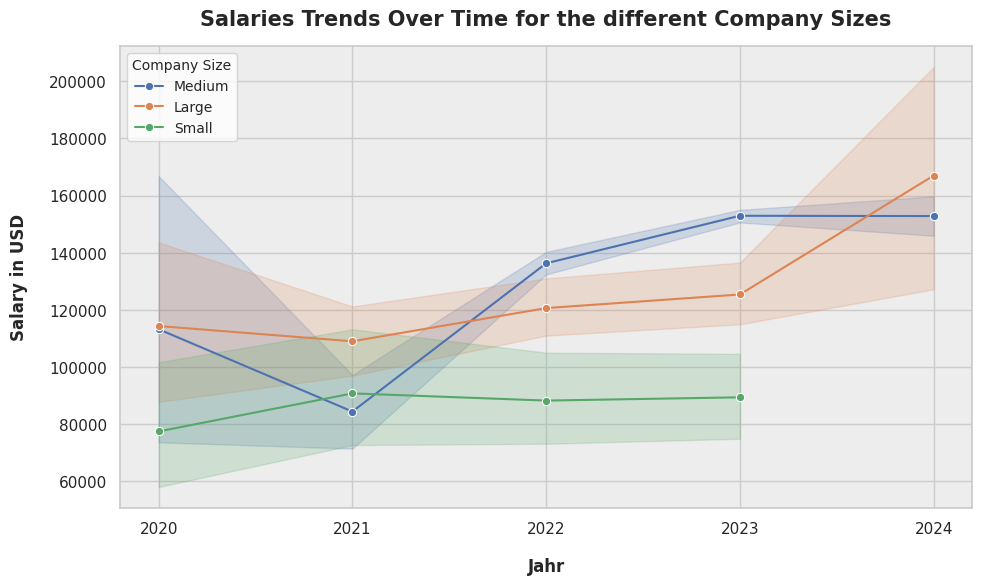

In [31]:
plt.figure(figsize=(11, 6))

p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o', ci=95)

plt.title('Salaries Trends Over Time for the different Company Sizes', fontsize=15, fontweight='bold', pad=15)
plt.xticks(ticks=[2020, 2021, 2022, 2023, 2024], labels=[2020, 2021, 2022, 2023, 2024])
plt.xlabel('Jahr', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Salary in USD', fontsize=12, fontweight='bold', labelpad=15)

p.set_facecolor("#ededed")

plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

plt.show()

In [23]:
# Ausreißer herausfiltern - Quartile / 1.5 IQR nutzen

q1=df['salary_in_usd'].quantile(0.25)
q3=df['salary_in_usd'].quantile(0.75)
IQR=q3-q1
#outliers = df3.mean_percentage[((df3.mean_percentage<(q1-1.5*IQR)) | (df3.mean_percentage>(q3+1.5*IQR)))]
not_outliers = df[~((df['salary_in_usd']<(q1-1.5*IQR)) | (df['salary_in_usd']>(q3+1.5*IQR)))]
df_outliers_dropped = not_outliers.dropna().reset_index()
df_outliers_dropped

,index,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6594,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
6488,6595,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
6489,6596,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
6490,6597,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


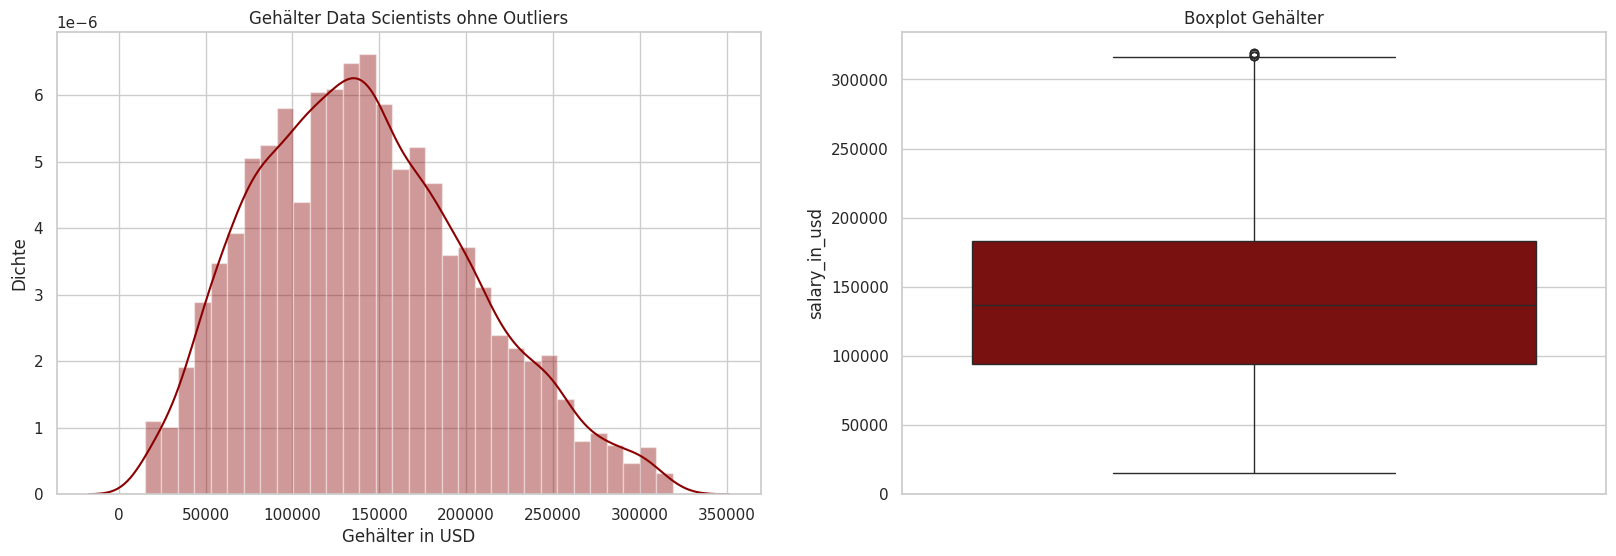

In [24]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Gehälter Data Scientists ohne Outliers')
sns.distplot(df_outliers_dropped['salary_in_usd'], color = 'darkred')
plt.xlabel('Gehälter in USD')
plt.ylabel('Dichte')

plt.subplot(1,2,2)
plt.title('Boxplot Gehälter')
sns.boxplot(y=df_outliers_dropped['salary_in_usd'], color = 'darkred')

plt.show()

----------

# Zusammenfassung zu ersten EDA "Data Scientist Salaries"



1.   Im Datensatz gibt es keine fehlenden oder redundanten Daten.
2.   Die Verdienste der Data Scientists sind normal-verteilt, die Verteilung ist skewed (schief).
3.   Es gibt signifikante Unterschiede zwischen den Gehältern der Kategorien in der Gruppierung "Experience Level". Allerdings sind die Kategorien nicht gleichmäßig besetzt, was einen Einfluss auf die statistischen Analysen haben kann (deutlich mehr Samples aus der Kategorie 'Senior', viel weniger in Kategorie 'Executive').
4.   Die Mehrheit der Gehälter aller Gruppen ist mit den Jahren deutlich angestiegen.  
5.   Es existieren Ausreißer, die sich basierend auf statistischen Analysen entfernen lassen.
   
-----------------

**Deskriptive und diagnostische Analyse!**

**Beschreibunfg des Datensatzes - aber unsere Analyse ist nicht vollständig!. Eine umfassenden Anlayse kann zur Bewertung des Zustandes in der Vergangenheit bzw. der aktuellen Situation verwendet werden (hindcast, nowcast). Unter Umständen lassen sich auch Vorhersagen zur Gehälterentwicklung ableiten (forecast).**


